In [1]:
!pip install seaborn

In [2]:
!pip install scikit-learn

In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
# import cv2
import os
import tensorflow as tf
from PIL import Image
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical
from keras.layers import BatchNormalization
from keras.optimizers import Adam
from keras.models import Model
from keras.layers import Dense
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

In [28]:
print(os.getcwd())
os.chdir('C:/Users/user/Desktop/data')
count = 0
path = "Train"
data = [] 
label = []
classes =  44
cur_path = os.getcwd()

C:\Users\user\Desktop\data


In [30]:
myList = os.listdir(path)
noOfClasses = len(myList)
print("importing classes ...")
for x in range(0, noOfClasses):
    myPicList = os.listdir(path+"/"+str(count))
    for y in myPicList:
        curImg = Image.open(path+"/"+str(count)+"/"+y)
        curImg = curImg.resize((32,32))
        curImg = np.array(curImg)
        data.append(curImg)
        label.append(count)
    print(count, end=" ")
    count +=1
data = np.array(data)
label = np.array(label)

importing classes ...
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'Train/44'

In [31]:
np.save('./Train/data', data)
np.save('./Train/target', label)

In [32]:
data = np.load('./Train/data.npy', allow_pickle=True)
label = np.load('./Train/target.npy', allow_pickle=True)

In [33]:
# no_of_Nodes =44
noOfClasses = 44
print(data.shape, label.shape)

(40011, 32, 32, 3) (40011,)


In [35]:
x_train, x_test, y_train, y_test = train_test_split(data, label, test_size= 0.2, random_state= 42, shuffle=True)
x_train = x_train/255 
x_test =x_test/255
# normalization 

In [36]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(32008, 32, 32, 3) (8003, 32, 32, 3) (32008,) (8003,)


In [37]:
y_train = to_categorical(y_train, 44)
y_test = to_categorical(y_test, 44)

In [14]:
def myModel():
        
        no_of_filter = 60
        size_of_fliter=(5,5)
        size_of_fliter2=(3,3)
        size_of_pool = (2,2)
        no_of_Nodes = 256
        input_shape= (32,32,3)
        model = Sequential()
        model.add(Conv2D(16, size_of_fliter, input_shape=input_shape, activation='relu'))
        model.add(Conv2D(32, size_of_fliter2, activation='relu' ))
        model.add(MaxPool2D(pool_size = size_of_pool))
        model.add(BatchNormalization(axis=-1))
        model.add(Dropout(rate=0.25))
        model.add(Conv2D(64, size_of_fliter2, activation ='relu'))
        model.add(Conv2D(128, size_of_fliter2, activation= 'relu'))
        model.add(MaxPool2D(pool_size=size_of_pool))
        model.add(BatchNormalization(axis=-1))
        model.add(Dropout(rate=0.25))
        
        model.add(Flatten())
        model.add(Dense(512, activation= 'relu'))
        model.add(BatchNormalization())
        model.add(Dropout(rate=0.5)) 
        model.add(Dense(noOfClasses, activation = 'softmax'))
        model.compile(loss = 'categorical_crossentropy',
                   optimizer = 'adam',
                   metrics = ['accuracy'])
        return model


In [15]:
model=myModel()

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 16)        1216      
                                                                 
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        4640      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 13, 13, 32)       128       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 13, 13, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 11, 11, 64)        1

In [17]:
datagen = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.15,
    horizontal_flip=True,
    vertical_flip=False,
    fill_mode="nearest")
datagen.fit(x_train)

In [22]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, CSVLogger
filepath="./models/model1.h5" 
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')


early_stop = EarlyStopping(monitor='val_loss', patience=3, verbose=1)

log_csv = CSVLogger('my_logs.csv', separator=',', append=False) #File name includes epoch and validation accuracy.

callbacks_list = [checkpoint, early_stop, log_csv]

In [23]:
epochs = 10
model=myModel()
history = model.fit(datagen.flow(x_train,
                             y_train,
                             batch_size=32),
                             epochs=epochs,
                             validation_data=(x_test, y_test),
                             callbacks= callbacks_list)
model.save("improved_model_1.h5")

Epoch 1/10
1001/1001 [==============================] - ETA: 0s - loss: 1.8145 - accuracy: 0.5003
Epoch 1: val_accuracy improved from -inf to 0.86930, saving model to ./models\model1.h5
1001/1001 [==============================] - 206s 192ms/step - loss: 1.8145 - accuracy: 0.5003 - val_loss: 0.3939 - val_accuracy: 0.8693
Epoch 2/10
1001/1001 [==============================] - ETA: 0s - loss: 0.6513 - accuracy: 0.7896
Epoch 2: val_accuracy improved from 0.86930 to 0.91653, saving model to ./models\model1.h5
1001/1001 [==============================] - 191s 185ms/step - loss: 0.6513 - accuracy: 0.7896 - val_loss: 0.2501 - val_accuracy: 0.9165
Epoch 3/10
1001/1001 [==============================] - ETA: 0s - loss: 0.4300 - accuracy: 0.8601
Epoch 3: val_accuracy improved from 0.91653 to 0.94240, saving model to ./models\model1.h5
1001/1001 [==============================] - 222s 216ms/step - loss: 0.4300 - accuracy: 0.8601 - val_loss: 0.1682 - val_accuracy: 0.9424
Epoch 4/10
1001/1001 [===

In [ ]:
model.save("./training/TSR.h5")

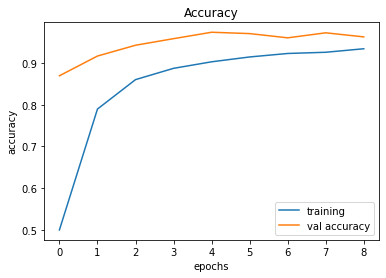

In [24]:
plt.figure(0)
plt.plot(history.history['accuracy'], label= 'training')
plt.plot(history.history['val_accuracy'],label=  'val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

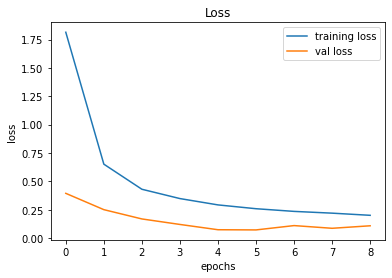

In [25]:
plt.figure(0)
plt.plot(history.history['loss'], label= 'training loss')
plt.plot(history.history['val_loss'],label=  'val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [38]:
num_samples = []
for i in range(classes):
    file_count = len(os.listdir(path+"/"+str(i)))
    num_samples.append(file_count)
print(len(num_samples))  

44


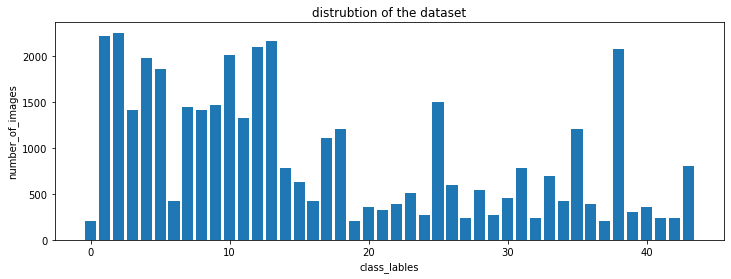

In [39]:
plt.figure(figsize = (12,4))
plt.bar(range(0, len(num_samples)),num_samples)
plt.title('distrubtion of the dataset')
plt.xlabel("class_lables")
plt.ylabel("number_of_images")
plt.show()

C:\Program Files\KMSpico\temp\ipykernel_11604\1285134869.py:14: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=None)


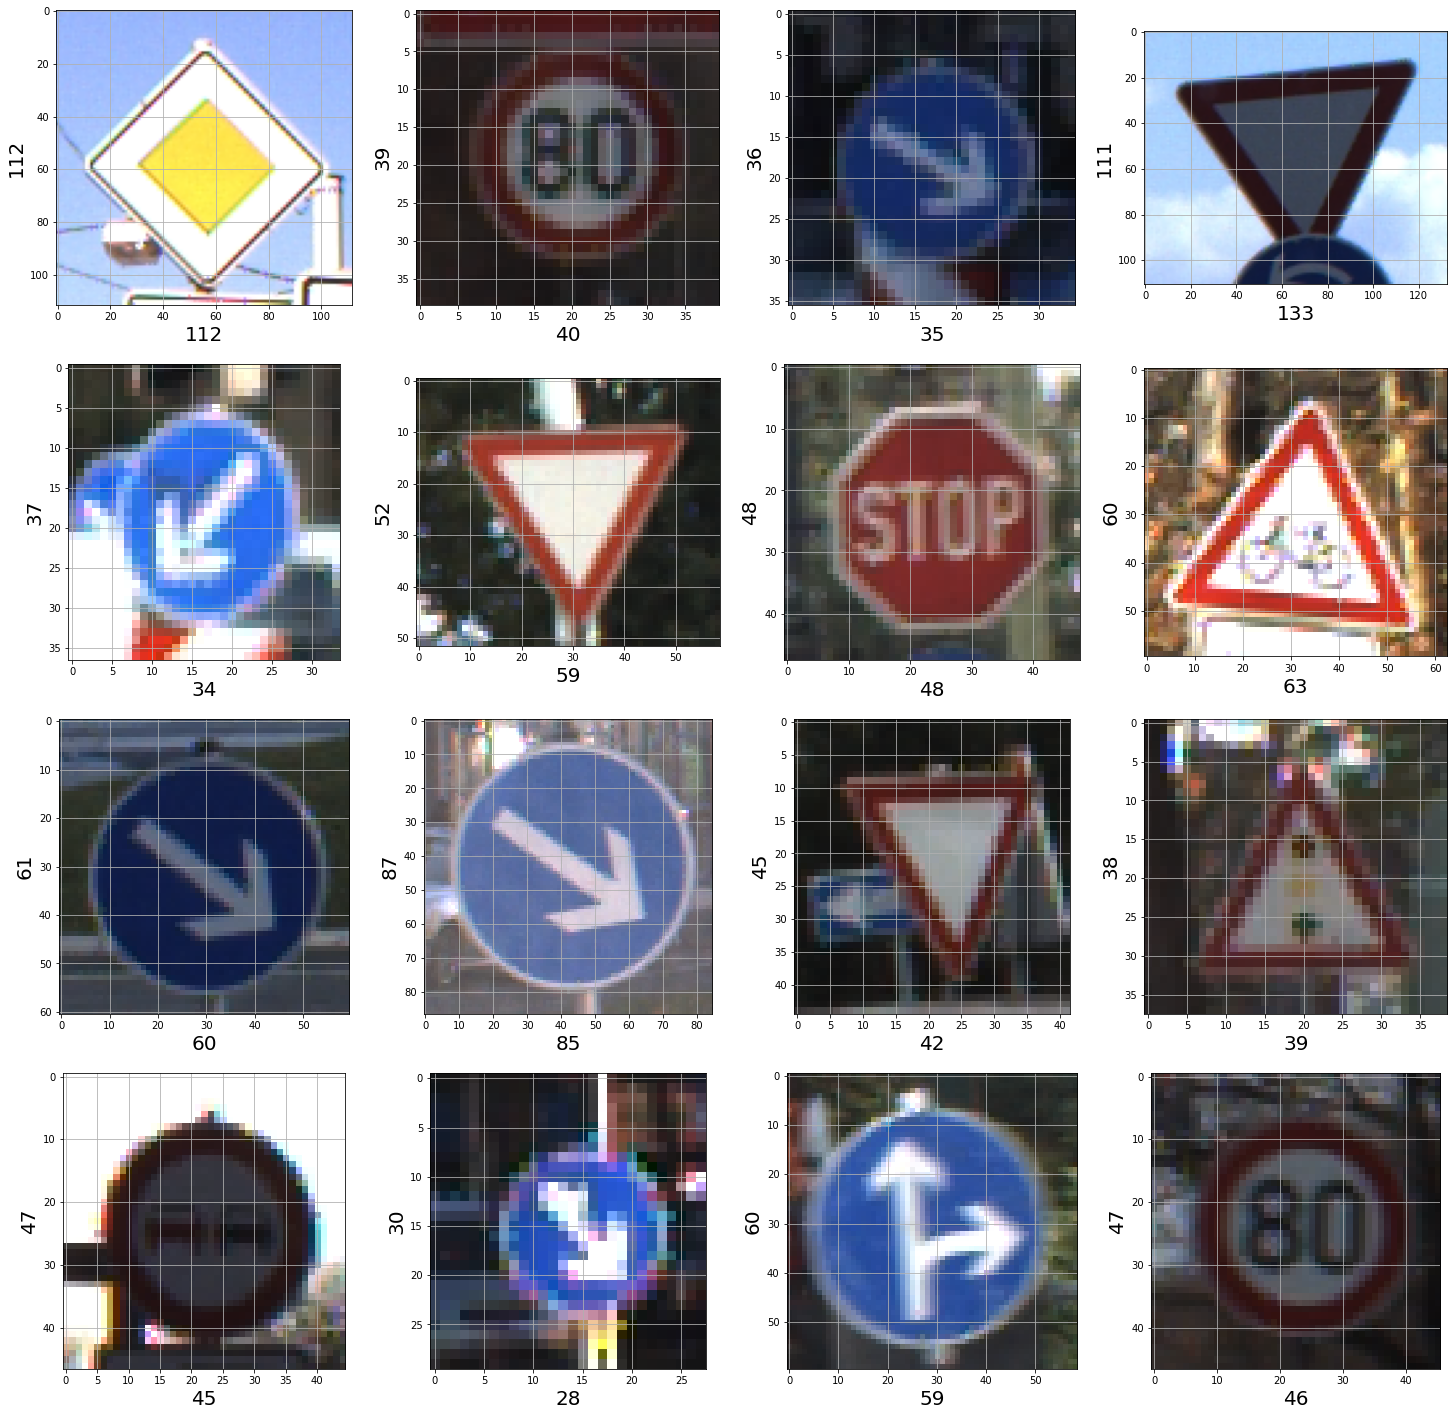

In [40]:
import random 
from matplotlib.image import imread

test  = y_test = pd.read_csv('test.csv')
imgs = test["Path"].values

plt.figure(figsize=(25,25))
 
for i in range(1,17):
    plt.subplot(4,4,i)
    ramdom_image_path =random.choice(imgs)
    rand_img = imread(ramdom_image_path)
    plt.imshow(rand_img)
    plt.grid(b=None)
    plt.xlabel(rand_img.shape[1], fontsize = 20)
    plt.ylabel(rand_img.shape[0], fontsize= 20)

In [43]:
model.save("./Train/TSR.h5")

In [44]:
import keras
import os
os.chdir(r'C:/Users/user/Desktop/data')
from keras.models import load_model
model = load_model("./Train/TSR.h5")

In [45]:
import pandas as pd
def testing(testcsv):
    y_test = pd.read_csv(testcsv)
    label =  y_test['ClassId'].values
    imags = y_test['Path'].values
    data= []
    for img in imags: 
        image = Image.open(img)
        image = image.resize((32,32))
        image = np.array(image)
        data.append(image)
    x_test = np.array(data)
    return x_test,label

In [46]:
x_test, label = testing('Test.csv')

In [47]:
predict_x=model.predict(x_test) 
classes_x=np.argmax(predict_x,axis=1)
classes_x

395/395 [==============================] - 21s 26ms/step


array([16,  1, 39, ..., 39,  7, 10], dtype=int64)

In [48]:
from sklearn.metrics import accuracy_score
print(accuracy_score(label, classes_x))

0.6794932699920824


In [49]:
model1=myModel()

In [64]:
classes = {
     0:'Speed Limit 20 km/h $ የፍጥነት ገደብ በሰዓት 20 ኪ.ሜ',
     1:'Speed Limit 30 km/h $ የፍጥነት ገደብ 30 ኪ.ሜ',
     2:'Speed Limit 50 km/h $ የፍጥነት ገደብ 50 ኪ.ሜ',
     3:'Speed Limit 60 km/h $የፍጥነት ገደብ 60 ኪ.ሜ',
     4:'Speed Limit 70 km/h $የፍጥነት ገደብ በሰዓት 70 ኪ.ሜ',
     5:'Speed Limit 80 km/h $የፍጥነት ገደብ 80 ኪ.ሜ',
     6:'End of Speed Limit 80 km/h $የፍጥነት ገደብ በሰዓት 80 ኪ.ሜ',
     7:'Speed Limit 100 km/h $ የፍጥነት ገደብ 100 ኪ.ሜ',
     8:'Speed Limit 120 km/h $የፍጥነት ገደብ 120 ኪ.ሜ',
     9:'No passing $ማለፊያ የለም።',
     10:'No passing for vechiles over 3.5 metric tons $ከ3.5 ሜትሪክ ቶን በላይ ለሆኑ ተሽከርካሪዎች ማለፍ አይቻልም',
     11:'Right-of-way at the next intersection $በሚቀጥለው መስቀለኛ መንገድ ላይ የመሄድ መብት',
     12:'Priority road $ቅድሚያ የሚሰጠው መንገድ',
     13:'Yield $ምርት',
     14:'Stop $አቁም',
     15:'No vechiles $ተሽከርካሪዎች የሉም',
     16:'Vechiles over 3.5 metric tons prohibited $ከ3.5 ሜትሪክ ቶን በላይ የሆኑ ተሽከርካሪዎች የተከለከሉ ናቸው።',
     17:'No entry $ምንም መግቢያ የለም።',
     18:'General caution $ አጠቃላይ ጥንቃቄ',
     19:'Dangerous curve to the left $ አደገኛ ኩርባ ወደ ግራ',
     20:'Dangerous curve to the right $ አደገኛ ኩርባ ወደ ቀኝ',
     21:'Double curve $ ድርብ ኩርባ',
     22:'Bumpy road $ ጎበዝ መንገድ',
     23:'Slippery road $ ተንሸራታች መንገድ',
     24:'Road narrows on the right $ በቀኝ በኩል መንገዱ ጠባብ ነው።',
     25:'Road work $ የመንገድ ሥራ',
     26:'Traffic signals $ የትራፊክ ምልክቶች',
     27:'Pedestrians $ እግረኞች',
     28:'Children crossing $ ልጆች መሻገር',
     29:'Bicycles crossing $ ብስክሌቶች መሻገሪያ',
     30:'Beware of ice/snow $ ከበረዶ / በረዶ ይጠንቀቁ',
     31:'Wild animals crossing $የዱር እንስሳት መሻገር',
     32:'End of all speed and passing limits $ የሁሉም ፍጥነት እና ማለፊያ ገደቦች መጨረሻ',
     33:'Turn right ahead $ ወደ ቀኝ ወደፊት ይታጠፉ',
     34:'Turn left ahead $ ወደ ፊት ወደ ግራ ይታጠፉ',
     35:'Ahead only $ ወደፊት ብቻ',
     36:'Go straight or right $ ቀጥታ ወይም ቀኝ ሂድ',
     37:'Go straight or left $ ወደ ግራ ወይም ቀጥታ ይሂዱ',
     38:'Keep right $ በትክክል ይያዙ',
     39:'Keep left $ ወደ ግራ ቀጥል ',
     40:'Roundabout mandatory $ አደባባዩ አስገዳጅ',
     41:'End of no passing $ ያለማለፍ መጨረሻ',
     42:'End of no passing by vechiles over 3.5 metric tons : ከ 3.5 ሜትሪክ ቶን በላይ በተሽከርካሪዎች ማለፍ የሌለበት መጨረሻ',
     43:'unknown',
 
}

In [65]:
from PIL import Image
import numpy as np
# import cv2
import matplotlib.pyplot as plt

def test_on_img(img):
    data=[]
    image = Image.open(img)
    image = image.resize((32,32))
    image = np.array(image)
    data.append(image)
    x_test = np.array(data)
    predict_x=model.predict(x_test) 
    classes_x=np.argmax(predict_x,axis=1)
    return image,classes_x

1/1 [==============================] - 6s 6s/step
prediction of traffic sign is Turn right ahead $ ወደ ቀኝ ወደፊት ይታጠፉ


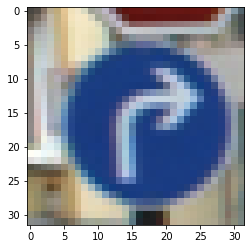

In [66]:
plot, prediction = test_on_img('C:/Users/user/Desktop/data/Test/00021.png')
s= [str(i) for i in prediction]
a=  int("".join(s))
print("prediction of traffic sign is", classes[a])
plt.imshow(plot)
plt.show()

1/1 [==============================] - 7s 7s/step
prediction of traffic sign is unknown


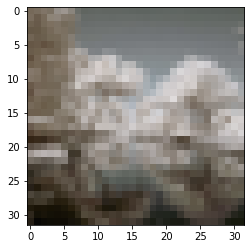

In [67]:
plot, prediction = test_on_img('C:/Users/user/Desktop/data/Test/photo-1541958409-7618fd1ad26e.jpg')
s= [str(i) for i in prediction]
a=  int("".join(s))
print("prediction of traffic sign is", classes[a])
plt.imshow(plot)
plt.show()

1/1 [==============================] - 5s 5s/step
prediction of traffic sign is No entry $ምንም መግቢያ የለም።


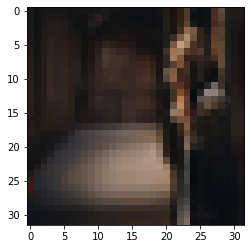

In [68]:
plot, prediction = test_on_img('C:/Users/user/Desktop/data/Test/download.jpg')
s= [str(i) for i in prediction]
a=  int("".join(s))
print("prediction of traffic sign is", classes[a])
plt.imshow(plot)
plt.show()

1/1 [==============================] - 7s 7s/step
prediction of traffic sign is unknown


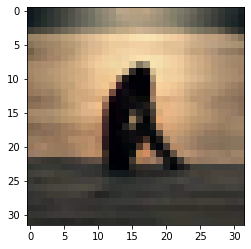

In [69]:
plot, prediction = test_on_img('C:/Users/user/Desktop/data/Test/down.jpg')
s= [str(i) for i in prediction]
a=  int("".join(s))
print("prediction of traffic sign is", classes[a])
plt.imshow(plot)
plt.show()

In [70]:
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(label, classes_x)

<AxesSubplot:>

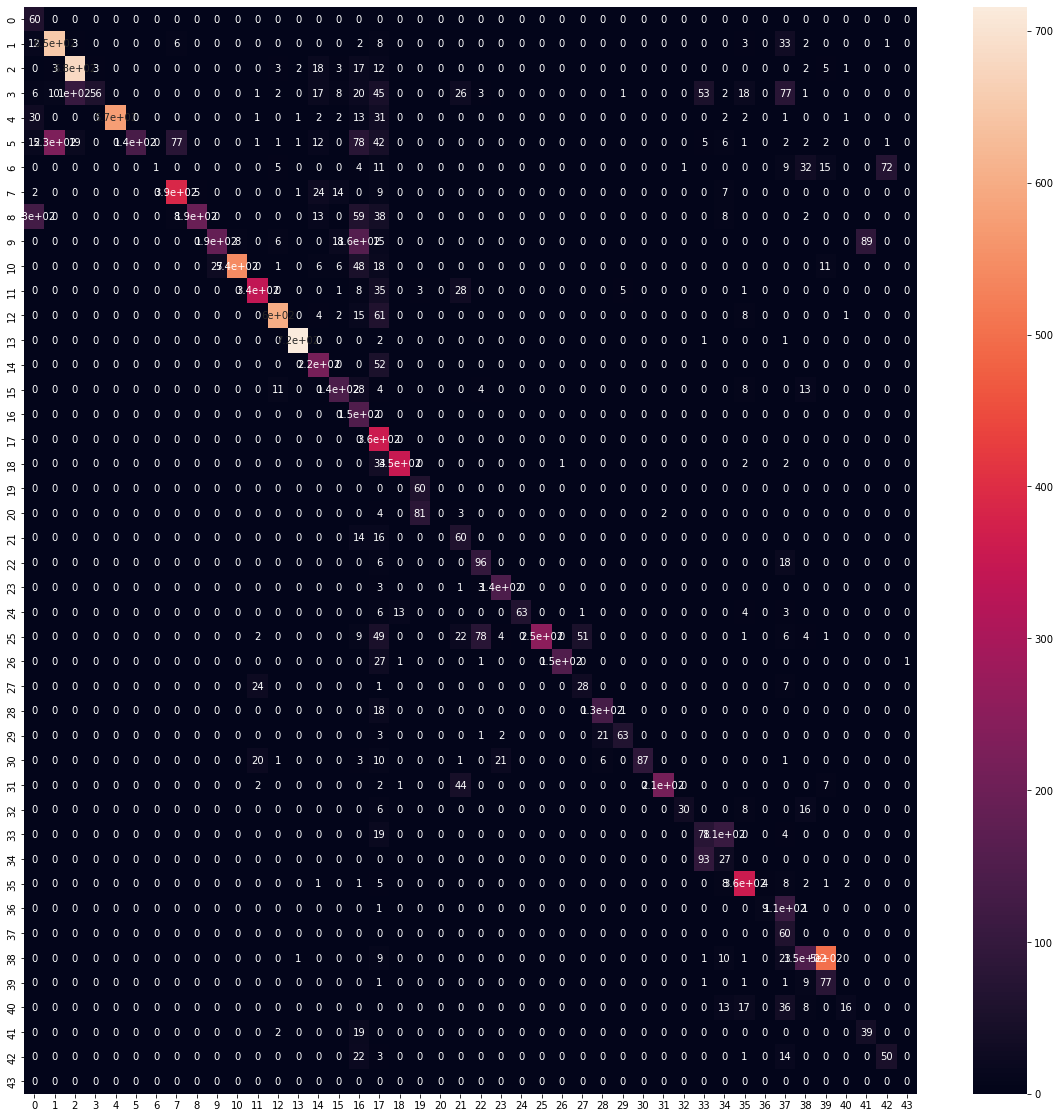

In [71]:
import seaborn as sns
df_cm = pd.DataFrame(cf, index = classes,  columns = classes)
plt.figure(figsize = (20,20))
sns.heatmap(df_cm, annot=True)